In [6]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('red_wine.csv')

# Generate a basic profile report using pandas
report = data.describe(include='all')

# Save the report to an HTML file
report.to_html("red_wine_report.html")


In [22]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict
import numpy as np

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Split the data into features and target
X = data.drop('type', axis=1)
y = data['type']

# Create a dictionary of models
models = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM Linear": SVC(kernel="linear", probability=True),  # Enable probability estimates
    "SVM RBF": SVC(kernel="rbf", probability=True),  # Enable probability estimates
    "Random Forest": RandomForestClassifier()
}

# Initialize dictionaries to store results
auc_scores = {}
accuracy_scores = {}

# Iterate through the models and perform cross-validation
for model_name, model in models.items():
    # Calculate AUC scores
    auc = cross_val_score(model, X, y, cv=10, scoring="roc_auc_ovo")
    auc_scores[model_name] = auc
    
    # Calculate accuracy scores
    y_pred = cross_val_predict(model, X, y, cv=10)
    accuracy = accuracy_score(y, y_pred)
    accuracy_scores[model_name] = accuracy

# Calculate the baseline AUC and accuracy
baseline_auc = 0.5  # AUC for a random classifier
baseline_accuracy = np.mean(y == y.mode().values[0])

# Display the results
print("Baseline Model AUC:", baseline_auc)
print("Baseline Model Accuracy:", baseline_accuracy)
for model_name in models:
    print(f"{model_name} AUC:", np.mean(auc_scores[model_name]))
    print(f"{model_name} Accuracy:", np.mean(accuracy_scores[model_name]))

Baseline Model AUC: 0.5
Baseline Model Accuracy: 0.5288966725043783
Baseline AUC: 0.5
Baseline Accuracy: 0.5288966725043783
Logistic Regression AUC: 0.8799019697944429
Logistic Regression Accuracy: 0.7845884413309983
Naive Bayes AUC: 0.8954078975584352
Naive Bayes Accuracy: 0.8213660245183888
Decision Tree AUC: 0.744054774377355
Decision Tree Accuracy: 0.7495621716287215
SVM Linear AUC: 0.8814885274025059
SVM Linear Accuracy: 0.7915936952714536
SVM RBF AUC: 0.868981864411972
SVM RBF Accuracy: 0.5359019264448336
Random Forest AUC: 0.892824954814202
Random Forest Accuracy: 0.7863397548161121


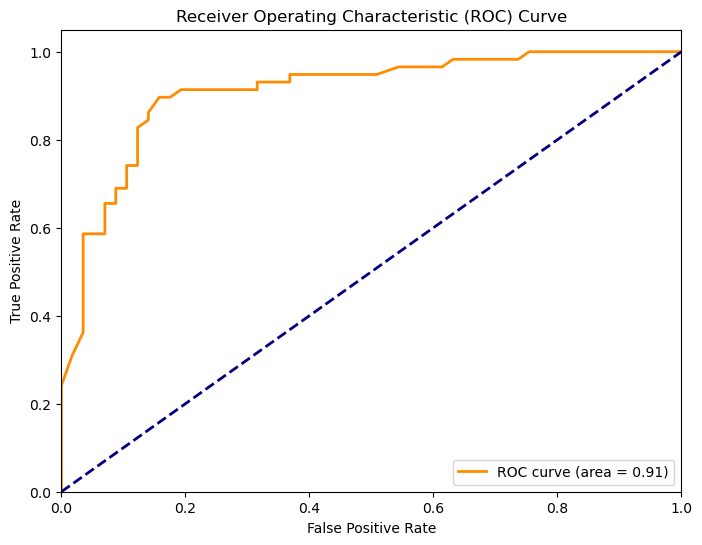

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Map 'high' and 'low' to binary labels (e.g., 'high' to 1, 'low' to 0)
data['type'] = data['type'].map({'high': 1, 'low': 0})

# Split the data into features and binary target
X = data.drop('type', axis=1)
y = data['type']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the red wine dataset
red_wine_data = pd.read_csv('red_wine.csv')

# Load the white wine dataset
white_wine_data = pd.read_csv('white_wine.csv')

# Assuming that "Random Forest" is the best model based on your previous code
# You should adjust this if you determined a different best model
best_model = RandomForestClassifier()

# Label encode the target variable in the red wine dataset if needed
# For example, if 'type' is a non-binary label ('high' and 'low'), you need to map it to binary labels
label_encoder = LabelEncoder()
red_wine_data['type'] = label_encoder.fit_transform(red_wine_data['type'])

# Split the red wine dataset into features and target
X_red = red_wine_data.drop('type', axis=1)
y_red = red_wine_data['type']

# Perform 10-fold cross-validation on the red wine dataset and calculate AUC
cross_val_auc = cross_val_score(best_model, X_red, y_red, cv=10, scoring='roc_auc')
average_cross_val_auc = cross_val_auc.mean()

# Split the white wine dataset into features and target
X_white = white_wine_data.drop('type', axis=1)
y_white = label_encoder.transform(white_wine_data['type'])  # Label encode if needed

# Fit the model to the red wine dataset
best_model.fit(X_red, y_red)

# Calculate the AUC on the white wine dataset
y_pred_white = best_model.predict_proba(X_white)[:, 1]
auc_white = roc_auc_score(y_white, y_pred_white)

# Print the results
print(f'10-Fold Cross-Validation AUC on red_wine.csv: {average_cross_val_auc:.2f}')
print(f'AUC on white_wine.csv: {auc_white:.2f}')

10-Fold Cross-Validation AUC on red_wine.csv: 0.89
AUC on white_wine.csv: 0.98
